Problem 2

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import itertools

In [2]:
import numpy as np

# Parse the data
data = """
6.1101,17.592
5.5277,9.1302
8.5186,13.662
7.0032,11.854
5.8598,6.8233
8.3829,11.886
7.4764,4.3483
8.5781,12
6.4862,6.5987
5.0546,3.8166
5.7107,3.2522
14.164,15.505
5.734,3.1551
8.4084,7.2258
5.6407,0.71618
5.3794,3.5129
6.3654,5.3048
5.1301,0.56077
6.4296,3.6518
7.0708,5.3893
6.1891,3.1386
20.27,21.767
5.4901,4.263
6.3261,5.1875
5.5649,3.0825
18.945,22.638
12.828,13.501
10.957,7.0467
13.176,14.692
22.203,24.147
5.2524,-1.22
6.5894,5.9966
9.2482,12.134
5.8918,1.8495
8.2111,6.5426
7.9334,4.5623
8.0959,4.1164
5.6063,3.3928
12.836,10.117
6.3534,5.4974
5.4069,0.55657
6.8825,3.9115
11.708,5.3854
5.7737,2.4406
7.8247,6.7318
7.0931,1.0463
5.0702,5.1337
5.8014,1.844
11.7,8.0043
5.5416,1.0179
7.5402,6.7504
5.3077,1.8396
7.4239,4.2885
7.6031,4.9981
6.3328,1.4233
6.3589,-1.4211
6.2742,2.4756
5.6397,4.6042
9.3102,3.9624
9.4536,5.4141
8.8254,5.1694
5.1793,-0.74279
21.279,17.929
14.908,12.054
18.959,17.054
7.2182,4.8852
8.2951,5.7442
10.236,7.7754
5.4994,1.0173
20.341,20.992
10.136,6.6799
7.3345,4.0259
6.0062,1.2784
7.2259,3.3411
5.0269,-2.6807
6.5479,0.29678
7.5386,3.8845
5.0365,5.7014
10.274,6.7526
5.1077,2.0576
5.7292,0.47953
5.1884,0.20421
6.3557,0.67861
9.7687,7.5435
6.5159,5.3436
8.5172,4.2415
9.1802,6.7981
6.002,0.92695
5.5204,0.152
5.0594,2.8214
5.7077,1.8451
7.6366,4.2959
5.8707,7.2029
5.3054,1.9869
8.2934,0.14454
13.394,9.0551
5.4369,0.61705
"""

# Convert the string data into a numpy array
data_array = np.array([[float(x) for x in row.split(',')] for row in data.strip().split('\n')])

# Separate features (X) and target variable (y)
X = data_array[:, :-1]  # Features are all columns except the last one
y = data_array[:, -1]   # Target variable is the last column



# Define minibatch gradient descent function
def minibatch_gradient_descent(X, y, w_start, iterations=200, alpha=0.01, batch_size=1):
    m = len(X)
    w = w_start
    J_values = []
    w_store = []
    
    # Determine the number of batches
    n_batches = int(np.ceil(m / batch_size))
    
    for _ in range(iterations):
        for i in range(n_batches):
            # Define batch indices
            b_start = i * batch_size
            b_end = min((i + 1) * batch_size, m)
            
            X_batch = X[b_start:b_end, :]
            y_batch = y[b_start:b_end]
            
            temp_w = w.copy()
            J_values.append(mse(w, X_batch, y_batch))
            w_store.append(w.flatten())

            gradient = np.dot(X_batch.T, (h(w, X_batch) - y_batch)) / batch_size
            w -= alpha * gradient
        
        #Shuffle the data for the next iteration
        indices = np.random.permutation(m)
        X = X[indices]
        y = y[indices]
            
    return w, np.array(w_store), np.array(J_values)

# Hypothesis function
def h(w, X):
    return np.dot(X, w)

# Mean squared error
def mse(w, X, y):
    return float((1. / (2 * y.size)) * np.dot((h(w, X) - y).T, (h(w, X) - y)))

# Initialize weights
w_start = np.zeros(X.shape[1])

# Define hyperparameters
iterations = 200
alpha = 0.01
batch_sizes = [1, 5, 10, 20]

# Perform minibatch gradient descent for each batch size
for batch_size in batch_sizes:
    w, w_store, J_values = minibatch_gradient_descent(X, y, w_start, iterations=iterations, alpha=alpha, batch_size=batch_size)
    print(f"Batch Size: {batch_size}, Final Weights: {w}")


Batch Size: 1, Final Weights: [1.18374163]
Batch Size: 5, Final Weights: [0.98309454]
Batch Size: 10, Final Weights: [0.78108779]
Batch Size: 20, Final Weights: [0.79947796]


In [3]:
def predict(xval):
    return w[0]*xval

In [4]:
predict(16)

12.791647306502893

### The price of a house in a city of population 160,000 is about $127,916.47


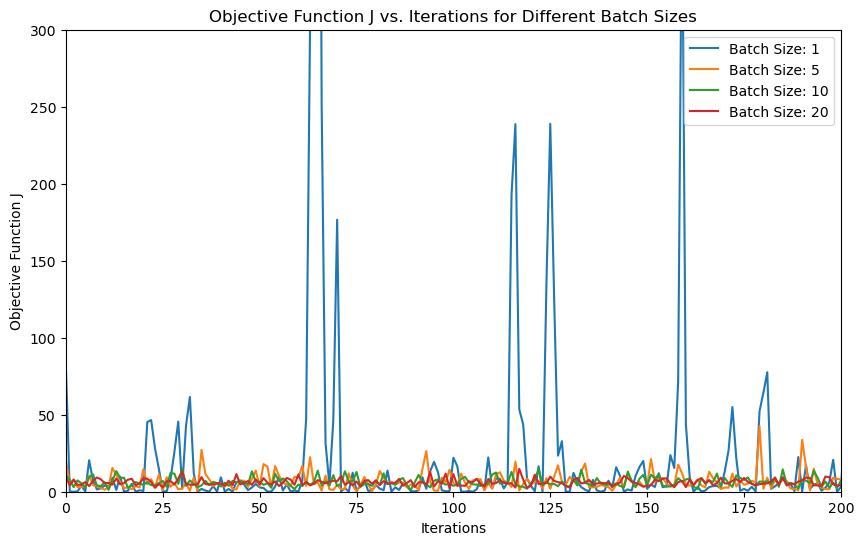

In [7]:
import matplotlib.pyplot as plt

# Define batch sizes to test
batch_sizes = [1, 5, 10, 20]

# Perform minibatch gradient descent for each batch size
J_values_all = []
for batch_size in batch_sizes:
    w, w_store, J_values = minibatch_gradient_descent(X, y, w_start, iterations, alpha, batch_size)
    J_values_all.append(J_values)

# Plot the objective function J for each batch size
plt.figure(figsize=(10, 6))
for i, batch_size in enumerate(batch_sizes):
    plt.plot(range(len(J_values_all[i])), J_values_all[i], label=f'Batch Size: {batch_size}')

plt.xlabel('Iterations')
plt.ylabel('Objective Function J')
plt.title('Objective Function J vs. Iterations for Different Batch Sizes')
plt.legend()

plt.ylim(0, 300)
plt.xlim(0, 200)

plt.show()


### From the plot, I can tell that though noice generally increases for decreasing batch sizes, using batch size of 1 generates an astoundingly much noisier plot than the others. On the other hand, larger batch sizes smooth out these updates by averaging gradients over more data points, resulting in less noisy updates and a smoother plot of the objective function.